In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('natconv.csv')
df = df.drop(columns=['Unnamed: 0']) # drop columns
df.head()

,user_id,partner_id,conversation,date,survey_duration_in_seconds,time_zone,pre_affect,pre_arousal,technical_quality,conv_length,...,your_agreeable,your_conscientious,your_neurotic,your_open,who_i_talked_to_most_past24,most_common_format_past24,speaker,backchannel_given,backchannel_recieved,backchannel_count
0,5a73899f9cdd1800017786f0,5fa072f4f4aa580b63834357,0020a0c5-1658-4747-99c1-2839e736b481,2020-11-10,4115,6.0,5.0,4.0,1.0,45.0,...,4.000000,4.666667,3.000000,4.666667,NaN,NaN,5a73899f9cdd1800017786f0,269,83,352
1,5a73899f9cdd1800017786f0,5fa072f4f4aa580b63834357,0020a0c5-1658-4747-99c1-2839e736b481,2020-11-10,4115,6.0,5.0,4.0,1.0,45.0,...,4.000000,4.666667,3.000000,4.666667,NaN,NaN,5fa072f4f4aa580b63834357,83,269,352
2,5fa072f4f4aa580b63834357,5a73899f9cdd1800017786f0,0020a0c5-1658-4747-99c1-2839e736b481,2020-11-10,3949,6.0,7.0,6.0,1.0,43.0,...,4.000000,4.333333,2.666667,3.666667,NaN,NaN,5a73899f9cdd1800017786f0,269,83,352
3,5fa072f4f4aa580b63834357,5a73899f9cdd1800017786f0,0020a0c5-1658-4747-99c1-2839e736b481,2020-11-10,3949,6.0,7.0,6.0,1.0,43.0,...,4.000000,4.333333,2.666667,3.666667,NaN,NaN,5fa072f4f4aa580b63834357,83,269,352
4,5f482b0da1cde52de45f174c,5f57120cba207c18f058a62b,002d68da-7738-4177-89d9-d72ae803e0e4,2020-11-15,3293,8.0,7.0,6.0,1.0,34.0,...,3.666667,2.666667,4.000000,4.000000,NaN,NaN,5f482b0da1cde52de45f174c,76,96,172


In [57]:
datadict_df = pd.read_csv('datadict.csv')
datadict_df

,column,text,sub_questions,type,selector,sub_selector,choices,notes
0,user_id,The ID of the respondent.,NaN,NaN,NaN,NaN,NaN,NaN
1,partner_id,The ID of the respondent's partner.,NaN,NaN,NaN,NaN,NaN,NaN
2,convo_id,The ID of the conversation.,NaN,NaN,NaN,NaN,NaN,NaN
3,date,The date of the survey.,NaN,NaN,NaN,NaN,NaN,NaN
4,survey_duration_in_seconds,Amount of time taken to complete the survey.,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
224,your_conscientious,"Now, please tell us where you think your conve...","tends to be quiet, is compassionate, has a sof...",matrix table,likert,single answer question,"1 - Disagree strongly, 2 - Disagree a little, ...",NaN
225,your_neurotic,"Now, please tell us where you think your conve...","tends to be quiet, is compassionate, has a sof...",matrix table,likert,single answer question,"1 - Disagree strongly, 2 - Disagree a little, ...",NaN
226,your_open,"Now, please tell us where you think your conve...","tends to be quiet, is compassionate, has a sof...",matrix table,likert,single answer question,"1 - Disagree strongly, 2 - Disagree a little, ...",NaN
227,who_i_talked_to_most_past24,Who were your conversations with? In other wor...,none,constant sum,number entry,text box,"Family, Romantic Partner, Friends, Work Collea...",NaN


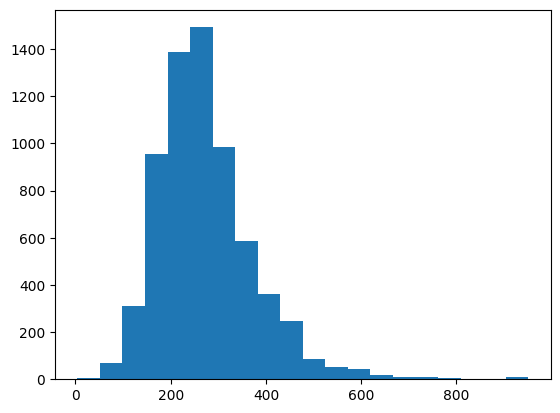

In [3]:
# Backchannel coutn distribution
plt.hist(df['backchannel_count'], bins=20)
plt.show()

In [44]:
df.corr().backchannel_count[abs(df.corr().backchannel_count)>0.2].sort_values()


i_felt_close_to_my_partner      0.211451
how_long_other                  0.229871
am_i_sheltering_in_place_now    0.232449
backchannel_given               0.644520
backchannel_recieved            0.644520
backchannel_count               1.000000
Name: backchannel_count, dtype: float64

In [53]:
corr = df.corr().backchannel_count[abs(df.corr().backchannel_count)>0.1].sort_values()
corr.to_csv("corr.csv")

In [63]:
a = datadict_df.loc[datadict_df['column'] == 'how_long_other']
a

,column,text,sub_questions,type,selector,sub_selector,choices,notes
119,how_long_other,How much longer do you think your partner woul...,none,multiple choice,single answer horizontal,text box,"About 5 minutes longer, About 10 minutes longe...",NaN


In [72]:
df_corr = pd.DataFrame(columns=['column', 'corr'])
df_corr['column'] = corr.index
df_corr['corr'] = corr.values
col_desct = []
for col in df_corr['column']:
    text = datadict_df.loc[datadict_df['column'] == col]['text']
    col_desct.append(text)
df_corr['column_description'] = col_desct
df_corr

,column,corr,column_description
0,your_mind_wander,-0.130299,"102 During your conversation, how much do y..."
1,interested_in_exchanging_contact_info,-0.129407,48 If you had the opportunity to exchange c...
2,my_sad_pre_covid,-0.122337,"195 Prior to the Covid-19 outbreak, to what..."
3,my_mind_wander,-0.120472,"101 During your conversation, how much did ..."
4,you_are_good_listener,0.101569,96 My partner was a good listener. Name: te...
...,...,...,...
56,how_long_other,0.229871,119 How much longer do you think your partn...
57,am_i_sheltering_in_place_now,0.232449,202 Are you currently staying at home most ...
58,backchannel_given,0.644520,"Series([], Name: text, dtype: object)"
59,backchannel_recieved,0.644520,"Series([], Name: text, dtype: object)"


In [74]:
df_corr.to_csv("corr.csv")

In [24]:
sorted(df.corr().backchannel_count[abs(df.corr().backchannel_count)>0.1].index)

['affect',
 'am_i_sheltering_in_place_now',
 'anticipated_each_other_sr6',
 'backchannel_count',
 'backchannel_given',
 'backchannel_recieved',
 'became_certain_of_perception_sr7',
 'best_affect',
 'conversationalist',
 'developed_joint_perspective_sr2',
 'discussed_real_things_sr4',
 'end_affect',
 'end_arousal',
 'end_you_time_1',
 'good_for_advice',
 'how_enjoyable',
 'how_long_other',
 'how_long_you',
 'i_felt_close_to_my_partner',
 'i_like_you',
 'i_paid_attention_to_my_partner',
 'i_would_like_to_become_friends',
 'interested_in_exchanging_contact_info',
 'middle_affect',
 'my_friends_like_you',
 'my_mind_wander',
 'my_partner_paid_attention_to_me',
 'my_partner_was_clear_and_coherent',
 'my_sad_pre_covid',
 'next_seven_days',
 'our_thoughts_synced_up_sr1',
 'overall_affect',
 'responsive',
 'responsive_1',
 'responsive_2',
 'responsive_3',
 'saw_world_in_same_way_sr8',
 'shared_reality',
 'shared_thoughts_feels_sr3',
 'thoughts_became_more_alike_sr5',
 'worst_affect',
 'worst_ar

In [26]:
sorted(df.corr().backchannel_count[abs(df.corr().backchannel_count)>0.1])

[-0.13029943348481537,
 -0.12940733523315887,
 -0.12233728147843417,
 -0.12047196019965463,
 0.10156919269097614,
 0.10243836874322207,
 0.1030827845488022,
 0.10470210282292884,
 0.10547857141510886,
 0.10602538723905988,
 0.10632813256403903,
 0.10738375868055866,
 0.10756271288316208,
 0.1085834306748567,
 0.10874735383741702,
 0.10957933013162187,
 0.11034112915371527,
 0.11046933022840555,
 0.11101838396708567,
 0.11107215552416742,
 0.11224750712297824,
 0.1127124675174185,
 0.11395457048898934,
 0.1156466070181187,
 0.11597751799989503,
 0.11664597916695986,
 0.11693667463290067,
 0.11876533798917732,
 0.11893172897179902,
 0.12166024653523681,
 0.123244356221823,
 0.12385345623649516,
 0.12460328569824708,
 0.1254875932070943,
 0.12584107926329163,
 0.12621479657562598,
 0.1262444512453988,
 0.12685555288652992,
 0.12960591038867678,
 0.1305422907938107,
 0.13124040650772434,
 0.13338144475315053,
 0.13651480848816538,
 0.13713846673545402,
 0.13842174810204227,
 0.141511619146

# Identifying Variables of Interest


In [75]:
df["how_know_partner"].unique()

array([nan, 'I press the wrong button.  Sorry ', 'Not known before',
       'I apologize, my touchpad slipped and I chose yes I think instead of no. i never met my partner before today.',
       'N/A I did not know this person!', 'We did not know each other',
       'We did not know well.', 'none'], dtype=object)